In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import stats

In [2]:
#Make ground truth distributions for the plot

# p hat is a mixture of Gaussians
ws_hat = [.6,.4]
sds_hat = [1,2]
us_hat = [4,-6]

u_hat = 0

#calculate its standard deviation
sd_hat = np.sqrt(ws_hat[0]*sds_hat[0]**2 + ws_hat[1]*sds_hat[1]**2 +ws_hat[0]*us_hat[0]**2+ws_hat[1]*us_hat[1]**2-(ws_hat[0]*us_hat[0]+ws_hat[1]*us_hat[1])**2)

def p_hat(x):
    return np.dot(ws_hat, [np.exp(-.5*((x-u)/sd)**2)/np.sqrt(2*np.pi*sd**2) for u,sd in zip(us_hat,sds_hat)]) 

# p_1 and p_2 are  both Gaussians, one with matching standard deviation, both with matching means
sd_1=sd_hat
u1 = 0
sd_2=3
u2 = 0

def p_1(x):
    return np.exp(-.5*((x-u1)/sd_1)**2)/np.sqrt(2*np.pi*sd_1**2)

def p_2(x):
    return np.exp(-.5*((x-u2)/sd_2)**2)/np.sqrt(2*np.pi*sd_2**2)

In [3]:
# colors
c1 = '#6FABD3'#'#3B6FA7'
c2 = '#F26C5D'#9A3740'
c3 = '#A0D39C'#'#8BCB8E' #347E52"

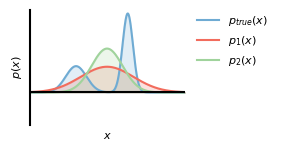

In [4]:
# Plot each distribution

with mpl.rc_context(fname='../../../matplotlibrc'):
    x = np.linspace(-20,20,1000)
    alpha = .2
    lw = 1.5
    plt.figure(figsize=(2,1.5))
    plt.plot(x,p_hat(x), color =c1,lw=lw, label =r'$p_{true}(x)$')
    plt.fill_between(x,p_hat(x),alpha=alpha,color=c1)
    plt.plot(x,p_1(x),color=c2,lw=lw, label =r'$p_1(x)$')
    plt.fill_between(x,p_1(x),alpha=alpha,color = c2)
    plt.plot(x,p_2(x),color=c3,lw=lw, label =r'$p_2(x)$')
    plt.fill_between(x,p_2(x),alpha=alpha,color=c3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-15,15)
    plt.ylim(-.1,.25)
    plt.xticks([])
    plt.yticks([])
    plt.axhline(0, lw=1.5,color='black',zorder =20)
    plt.ylabel(r"$p(x)$")

    # set z spine off
    plt.gca().spines['bottom'].set_visible(False)
    plt.xlabel(r"$x$")
    #plt.savefig("mixture.pdf",bbox_inches='tight',transparent=True)

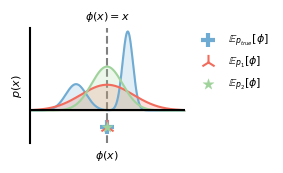

In [5]:
# Make panel with identity mapping

with mpl.rc_context(fname='../../../matplotlibrc'):
    x = np.linspace(-20,20,1000)

    alpha = .2
    lw = 1.5
    plt.figure(figsize=(2,1.5))
    plt.plot(x,p_hat(x), color =c1,lw=lw)
    plt.fill_between(x,p_hat(x),alpha=alpha,color=c1)
    plt.plot(x,p_1(x),color=c2,lw=lw)
    plt.fill_between(x,p_1(x),alpha=alpha,color = c2)
    plt.plot(x,p_2(x),color=c3,lw=lw)
    plt.fill_between(x,p_2(x),alpha=alpha,color=c3)
    plt.xlim(-15,15)
    plt.ylim(-.1,.25)
    plt.xticks([])
    plt.yticks([])
    plt.axvline(0, lw=1.5,ls='--',color='grey',zorder =-20)
    plt.axhline(0, lw=1.5,color='black',zorder =20)

    m1 = '+'
    m2='2'
    m3='*'
    lw1=3
    lw2=1.5
    lw3=.2
    ms1=100
    ms2=120
    ms3=70

    plt.scatter([0],[-.05],color = c1,marker =m1,s=ms1,lw=lw1, zorder = -10,label=r'$\mathbb{E}_{p_{true}}[\phi]$')
    plt.scatter([0],[-.05],color = c2,marker =m2, s=ms2,zorder=2, lw=lw2,label=r'$\mathbb{E}_{p_1}[\phi]$')
    plt.scatter([0],[-.05],color = c3,marker = m3,s=ms3,zorder=2, lw=lw3, label=r'$\mathbb{E}_{p_2}[\phi]$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r"$\phi(x) = x$")

    # set z spine off
    plt.gca().spines[['bottom']].set_visible(False)
    plt.xlabel(r"$\phi(x)$")
    plt.ylabel(r"$p(x)$")
    #plt.savefig("mixture2.pdf",bbox_inches='tight',transparent=True)

In [6]:
#FUNCTION FROM: https://github.com/artmenlope/matplotlib-fill_between-in-3D

"""
@author: artmenlope
"""

def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6):
    """
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:

        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.  
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))
            

In [7]:
# Apply polynomial mapping and estimate the new PDF

n_samples = 10000
sample_p_hat = np.concatenate([np.random.normal(us_hat[0],sds_hat[0],int(n_samples*ws_hat[0])),
                                 np.random.normal(us_hat[1],sds_hat[1],int(n_samples*ws_hat[1]))])

sample_p1 = np.random.normal(0,sd_1,n_samples)
sample_p2 = np.random.normal(0,sd_2,n_samples)

data_p_hat = np.array([sample_p_hat,sample_p_hat**2]).T
data_p1 = np.array([sample_p1,sample_p1**2]).T
data_p2 = np.array([sample_p2,sample_p2**2]).T

df_p_hat = pd.DataFrame(data_p_hat, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p1 = pd.DataFrame(data_p1, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p2 = pd.DataFrame(data_p2, columns=[r'$\phi_1$',r'$\phi_2$'])

mean_p_hat = data_p_hat.mean(axis=0)
mean_p1 = data_p1.mean(axis=0)
mean_p2 = data_p2.mean(axis=0)

width = .3
phi_hat = stats.gaussian_kde(data_p_hat[:,1],bw_method=width).pdf
phi_p1 = stats.gaussian_kde(data_p1[:,1],bw_method=width).pdf
phi_p2 = stats.gaussian_kde(data_p2[:,1],bw_method=width).pdf

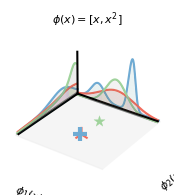

In [8]:
# Make panel with polynomial mapping

eps = 1
color='grey'
y_move =10

xlims = [-12,12]
ylims = [eps,55]

with mpl.rc_context(fname='../../../matplotlibrc'):

    fig = plt.figure(figsize=(3,2))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect(aspect=(2, 2, 1))

    x = np.linspace(xlims[0],xlims[1],1000)

    y = np.zeros_like(x)
    y1 = y+eps
    y2 = y+eps*2
    set_ground = [-x,y,np.zeros_like(x)]
    set_ground1 = [-x,y1,np.zeros_like(x)]
    set_ground2 = [-x,y2,np.zeros_like(x)]
    set_p_hat = [-x,y,p_hat(x)]
    set_p1 = [-x,y1,p_1(x)]
    set_p2 = [-x,y2,p_2(x)]

    ax.plot(*set_ground2,color=color,lw=lw)
    ax.plot(*set_p_hat,lw=lw,color=c1)
    ax.plot(*set_p1,lw=lw,color=c2)
    ax.plot(*set_p2,lw=lw,color=c3)

    alpha = .1
    fill_between_3d(ax, *set_ground, *set_p_hat, mode = 1,c=c1,alpha=alpha)
    fill_between_3d(ax, *set_ground1, *set_p1, mode = 1,c=c2,alpha=alpha)
    fill_between_3d(ax, *set_ground2, *set_p2, mode = 1,c=c3,alpha=alpha)

    y = np.linspace(ylims[0],ylims[1],1000)
    yl = y
    y_sc = 2.5
    eps = .2
    x = np.zeros_like(y)+xlims[1]
    x1 = x+eps
    x2 = x+eps*2
    set_ground = [x,yl,np.zeros_like(x)]
    set_ground1 = [x1,yl,np.zeros_like(x)]
    set_ground2 = [x2,yl,np.zeros_like(x)]
    set_p_hat = [x,yl,phi_hat(y)*y_sc]
    set_p1 = [x1,yl,phi_p1(y)*y_sc]
    set_p2 = [x2,yl,phi_p2(y)*y_sc]

    ax.plot(*set_ground2,color=color,lw=lw)
    ax.plot(*set_p_hat,lw=lw,color=c1)
    ax.plot(*set_p1,lw=lw,color=c2)
    ax.plot(*set_p2,lw=lw,color=c3)

    alpha = .1
    fill_between_3d(ax, *set_ground, *set_p_hat, mode = 1,c=c1,alpha=alpha)
    fill_between_3d(ax, *set_ground1, *set_p1, mode = 1,c=c2,alpha=alpha)
    fill_between_3d(ax, *set_ground2, *set_p2, mode = 1,c=c3,alpha=alpha)

    color='grey'

    lw = 1.5
    sc=.2
    plt.plot([xlims[0],xlims[1]],[ylims[0],ylims[0]],[0,0],c='black',lw=lw,zorder =1000)
    plt.plot([xlims[1],xlims[1]],[ylims[0],ylims[1]],[0,0],c='black',lw=lw,zorder =1000)
    plt.plot([xlims[1],xlims[1]],[ylims[0],ylims[0]],[0,max(np.max(phi_p2(y)*y_sc),.2)],c='black',lw=lw,zorder =1000)

    ax.scatter(mean_p_hat[0],mean_p_hat[1]+y_move,0,c=c1,
                marker=m1,s=ms1,zorder=0,lw=lw1)
    ax.scatter(mean_p2[0],mean_p2[1]+y_move,0,marker=m3,s=ms3,c=c3,zorder =12,lw=lw3)
    ax.scatter(mean_p1[0],mean_p1[1]+y_move,0,marker=m2,s=ms2,c=c2,zorder = 12,lw=lw2)

    ax.grid(False)
    plt.xticks([])
    plt.yticks([])
    ax.set_zticks([])

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo['axisline']['color'] = "white"
    ax.xaxis._axinfo['axisline']['linewidth'] = 0

    plt.xlim(xlims[0],xlims[1])
    plt.ylim(yl[0],yl[-1])
    ax.set_zlim(0,.2)
    ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.view_init(30, 125)
    
    plt.title(r"$\phi(x) = [x, x^2]$")
    plt.xlabel(r"$\phi_1(x)$")
    plt.ylabel(r"$\phi_2(x)$")

#plt.savefig("mixture3.pdf")